# FreeSurfer's `recon-all` Differences

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import swifter
from brainprint.recon_all.read import read_results
from itertools import combinations
from sklearn.preprocessing import StandardScaler

## Read Results

In [2]:
THE_BASE_PROTOCOL = {
    "Corrected": True,
    "Inversion Time": 1000,
    "Echo Time": 2.78,
    "Repetition Time": 2400,
    "Spatial Resolution": "[0.9, 0.9, 0.9]",
}

In [4]:
context, de_results = read_results(atlas="Destrieux")
_, dk_results = read_results(atlas="Desikan-Killiany")
iqms = pd.read_csv("/home/flavus/Projects/brainprint/data/iqm.csv")

In [5]:
iqms = iqms.drop_duplicates(subset="Origin").drop("Run ID", axis=1).set_index("Origin")
iqms.index.name = "Scan ID"

### Context

The `context` dataframe stores the contextual information about each anatomical scan.

In [15]:
counts = context.drop_duplicates(subset=["Session Time"])["Subject ID"].value_counts()

In [17]:
counts[counts >= 2]

9       8
577     6
228     6
233     6
281     6
       ..
174     2
2344    2
696     2
130     2
145     2
Name: Subject ID, Length: 215, dtype: int64

In [18]:
context

,Subject ID,Sex,Dominant Hand,Date of Birth,Session ID,Session Time,Scan ID,Scan Description,Scan File Name,Inversion Time,Echo Time,Repetition Time,Spatial Resolution,Corrected
Run ID,,,,,,,,,,,,,,
58,149,M,L,1994-10-18,195,2021-09-30 17:28:17.421000+00:00,8571,T1w_MPRAGE_RL,sub-149_ses-202109301728_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",True
59,148,M,R,1996-08-15,194,2021-09-29 16:55:45.501000+00:00,8516,T1w_MPRAGE_RL,sub-148_ses-202109291655_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",True
60,147,M,R,1994-08-16,193,2021-09-29 15:47:21.348000+00:00,8502,T1w_MPRAGE_RL,sub-147_ses-202109291547_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",True
61,149,M,L,1994-10-18,195,2021-09-30 17:28:17.421000+00:00,8568,T1w_MPRAGE_RL,sub-149_ses-202109301728_ce-uncorrected_T1w.ni...,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",False
62,147,M,R,1994-08-16,193,2021-09-29 15:47:21.348000+00:00,8469,T1w_MPRAGE_RL,sub-147_ses-202109291547_ce-uncorrected_T1w.ni...,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,2506,F,NaN,1993-11-24,3396,2022-03-31 09:22:07.107000+00:00,74630,T1w_MPRAGE_RL,sub-2506_ses-202203310922_ce-uncorrected_T1w.n...,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",False
5239,2479,M,NaN,1988-07-02,3333,2022-03-23 08:28:10.218000+00:00,73719,T1w_MPRAGE_RL,sub-2479_ses-202203230828_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",True
5240,359,F,NaN,1997-06-19,3439,2022-04-05 16:00:21.240000+00:00,75252,T1w_MPRAGE_RL,sub-359_ses-202204051600_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.9, 0.9, 0.9]",True


### `recon-all` Anatomical Statistics

The `results` dataframe stores the anatomical statistics calculated by `recon-all` for each anatomical scan.

In [19]:
shared_indices = set(dk_results.index) & set(de_results.index)

In [20]:
de_results = de_results.loc[shared_indices]

In [21]:
de_results

Hemisphere               Left                                   \
Region Name    G&S_cingul-Ant                                    
Metric      Average Thickness Folding Index Gray Matter Volume   
Run ID                                                           
58                      2.851          24.0             4764.0   
59                      2.755          29.0             5056.0   
60                      2.781          24.0             5466.0   
61                      2.813          29.0             4724.0   
62                      2.755          20.0             5185.0   
...                       ...           ...                ...   
5238                    2.412          14.0             3828.0   
5239                    2.600          18.0             4198.0   
5240                    2.774          22.0             4007.0   
5241                    2.485          25.0             4093.0   
5242                    2.617          20.0             3350.0   

Hemisphere                                           \
Region Name                                           
Metric      Integrated Rectified Gaussian Curvature   
Run ID                                                
58                                            0.024   
59                                            0.030   
60                                            0.023   
61                                            0.026   
62                                            0.022   
...                                             ...   
5238                                          0.020   
5239                                          0.021   
5240                                          0.028   
5241                                          0.026   
5242                                          0.024   

Hemisphere                                                                 \
Region Name                                                                 
Metric      Integrated Rectified Mean Curvature Intrinsic Curvature Index   
Run ID                                                                      
58                                        0.121                       2.2   
59                                        0.135                       3.2   
60                                        0.114                       2.6   
61                                        0.126                       2.3   
62                                        0.112                       2.4   
...                                         ...                       ...   
5238                                      0.104                       1.9   
5239                                      0.109                       1.9   
5240                                      0.127                       2.0   
5241                                      0.125                       2.2   
5242                                      0.116                       1.6   

Hemisphere                                                                  \
Region Name                               G&S_cingul-Mid-Ant                 
Metric      Surface Area Thickness StdDev  Average Thickness Folding Index   
Run ID                                                                       
58                1580.0            0.425              2.677           9.0   
59                1711.0            0.582              2.541          19.0   
60                1842.0            0.515              2.827           8.0   
61                1553.0            0.456              2.582          10.0   
62                1782.0            0.513              2.744           8.0   
...                  ...              ...                ...           ...   
5238              1554.0            0.481              2.364           7.0   
5239              1547.0            0.563              2.559           8.0   
5240              1316.0            0.523              2.734          13.0   
5241         

In [22]:
dk_results = dk_results.loc[shared_indices]
dk_results

Hemisphere               Left                                   \
Region Name          bankssts                                    
Metric      Average Thickness Folding Index Gray Matter Volume   
Run ID                                                           
58                      2.788          11.0             3183.0   
59                      2.469          10.0             2587.0   
60                      2.442          11.0             2686.0   
61                      2.764           9.0             2895.0   
62                      2.482          12.0             2735.0   
...                       ...           ...                ...   
5238                    2.551           8.0             2169.0   
5239                    2.584           7.0             2035.0   
5240                    2.469          11.0             2866.0   
5241                    2.585          11.0             2441.0   
5242                    2.682           4.0             1852.0   

Hemisphere                                           \
Region Name                                           
Metric      Integrated Rectified Gaussian Curvature   
Run ID                                                
58                                            0.017   
59                                            0.020   
60                                            0.018   
61                                            0.017   
62                                            0.018   
...                                             ...   
5238                                          0.020   
5239                                          0.017   
5240                                          0.018   
5241                                          0.019   
5242                                          0.012   

Hemisphere                                                                 \
Region Name                                                                 
Metric      Integrated Rectified Mean Curvature Intrinsic Curvature Index   
Run ID                                                                      
58                                        0.096                       1.3   
59                                        0.107                       1.5   
60                                        0.098                       1.3   
61                                        0.094                       1.3   
62                                        0.102                       1.4   
...                                         ...                       ...   
5238                                      0.108                       1.2   
5239                                      0.102                       0.9   
5240                                      0.099                       1.5   
5241                                      0.111                       1.4   
5242                                      0.075                       0.6   

Hemisphere                                                         \
Region Name                               caudalanteriorcingulate   
Metric      Surface Area Thickness StdDev       Average Thickness   
Run ID                                                              
58                1203.0            0.402                   2.468   
59                1100.0            0.435                   2.345   
60                1161.0            0.398                   2.849   
61                1113.0            0.423                   2.419   
62                1170.0            0.384                   2.917   
...                  ...              ...                     ...   
5238               916.0            0.416                   2.408   
5239               837.0            0.452                   2.383   
5240              1249.0            0.362                   2.571   
5241              1068.0            0.382                   2.215   
5242               720.0            0.409                   2

## Distinct Acquisition Protocols

In [23]:
context["Corrected"] = context["Scan File Name"].str.contains("ce-corrected")

In [24]:
context["Spatial Resolution"] = context["Spatial Resolution"].apply(lambda values: [round(float(value), 2) for value in values[1:-1].split(",")]).astype(str)

In [25]:
ACQUISITION_GROUPING = ["Inversion Time", "Echo Time", "Repetition Time", "Corrected", "Spatial Resolution"]
scan_parameter_counts = context.groupby(ACQUISITION_GROUPING).size().reset_index().rename(columns={0: "Count"}).sort_values("Count", ascending=False)
scan_parameter_counts.head()

,Inversion Time,Echo Time,Repetition Time,Corrected,Spatial Resolution,Count
24,1000.0,2.78,2400.0,True,"[0.9, 0.9, 0.9]",735
21,1000.0,2.78,2400.0,False,"[0.9, 0.9, 0.9]",721
13,1000.0,2.14,2400.0,False,"[0.7, 0.7, 0.7]",566
37,1100.0,2.88,2530.0,True,"[1.0, 1.0, 1.0]",215
10,900.0,2.84,1750.0,True,"[0.6, 0.6, 0.6]",96


## Differences Calculation

In [26]:
def calculate_difference(results: pd.DataFrame, run_1: int, run_2: int) -> np.array:
    return results.loc[run_1].to_numpy() - results.loc[run_2].to_numpy()

def check_same_subject(context: pd.DataFrame, run_1: int, run_2: int) -> bool:
    try:
        return context.loc[run_1, "Subject ID"] == context.loc[run_2, "Subject ID"]
    except AssertionError:
        print(f"Runs {run_1} and {run_2} raised AssertionError!")

def calculate_differences(results: pd.DataFrame, context: pd.DataFrame, sample_size: int = 100000) -> pd.DataFrame:
    run_combinations = pd.Series(combinations(results.index, 2))#.sample(sample_size)    
    values = run_combinations.swifter.apply(lambda runs: calculate_difference(results, runs[0], runs[1])).reset_index(drop=True)
    same_subject = run_combinations.swifter.apply(lambda runs: check_same_subject(context, runs[0], runs[1]))
    index = pd.MultiIndex.from_tuples(run_combinations)
    same_subject.index = index
    differences = pd.DataFrame.from_dict(dict(zip(index, values))).T
    differences.columns = results.columns
    differences.index.names = "Run 1", "Run 2"    
    return differences, same_subject

In [27]:
def calculate_cosine_similarity(results: pd.DataFrame, run_id_1: int, run_id_2: int) -> float:
    run_1 = results.loc[run_id_1]
    run_2 = results.loc[run_id_2]
    return np.dot(run_1, run_2)/(np.linalg.norm(run_1)*np.linalg.norm(run_2))

In [28]:
ATLAS = {"Desikan-Killiany": dk_results, "Destrieux": de_results}
common_protocols = "The Base (corrected)", "The Base (uncorrected)"#, "HCP"
differences = pd.DataFrame(columns=["Euclidean Distance", "Cosine Similarity", "Same Subject", "Protocol", "Atlas"])
for atlas, results in ATLAS.items():
    for rating, protocol in enumerate(common_protocols):
        run_mask = (context["Inversion Time"] == scan_parameter_counts.iloc[rating]["Inversion Time"]) & \
                   (context["Repetition Time"] == scan_parameter_counts.iloc[rating]["Repetition Time"]) & \
                   (context["Echo Time"] == scan_parameter_counts.iloc[rating]["Echo Time"]) & \
                   (context["Spatial Resolution"] == scan_parameter_counts.iloc[rating]["Spatial Resolution"]) & \
                   (context["Corrected"] == scan_parameter_counts.iloc[rating]["Corrected"])
        scaler = StandardScaler()
        standardized = results[run_mask].copy()
        flat = results[run_mask].copy()
        flat.columns = range(flat.columns.size)
        standardized.iloc[:, :] = scaler.fit_transform(flat.iloc[:, :])
        standardized.columns = results.columns
        within_protcol_differences, same_subject = calculate_differences(standardized, context)
        distances = np.sqrt((within_protcol_differences ** 2).sum(axis=1)).to_frame(name="Euclidean Distance")
        cosine_similarity = distances.reset_index()[["Run 1", "Run 2"]].swifter.apply(lambda runs: calculate_cosine_similarity(standardized, runs.iloc[0], runs.iloc[1]), axis=1)
        cosine_similarity.index = distances.index
        distances["Cosine Similarity"] = cosine_similarity
        distances["Same Subject"] = same_subject.astype(bool)
        distances["Protocol"] = protocol
        distances["Atlas"] = atlas
        differences = differences.append(distances)

/tmp/ipykernel_846319/2250523136.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  standardized = results[run_mask].copy()
/tmp/ipykernel_846319/2250523136.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flat = results[run_mask].copy()


Pandas Apply:   0%|          | 0/269745 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/269745 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

/tmp/ipykernel_846319/2250523136.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  standardized = results[run_mask].copy()
/tmp/ipykernel_846319/2250523136.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flat = results[run_mask].copy()


Pandas Apply:   0%|          | 0/254541 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/254541 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

/tmp/ipykernel_846319/2250523136.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  standardized = results[run_mask].copy()
/tmp/ipykernel_846319/2250523136.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flat = results[run_mask].copy()


Pandas Apply:   0%|          | 0/269745 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/269745 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

/tmp/ipykernel_846319/2250523136.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  standardized = results[run_mask].copy()
/tmp/ipykernel_846319/2250523136.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flat = results[run_mask].copy()


Pandas Apply:   0%|          | 0/254541 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/254541 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

## Distribution of Differences

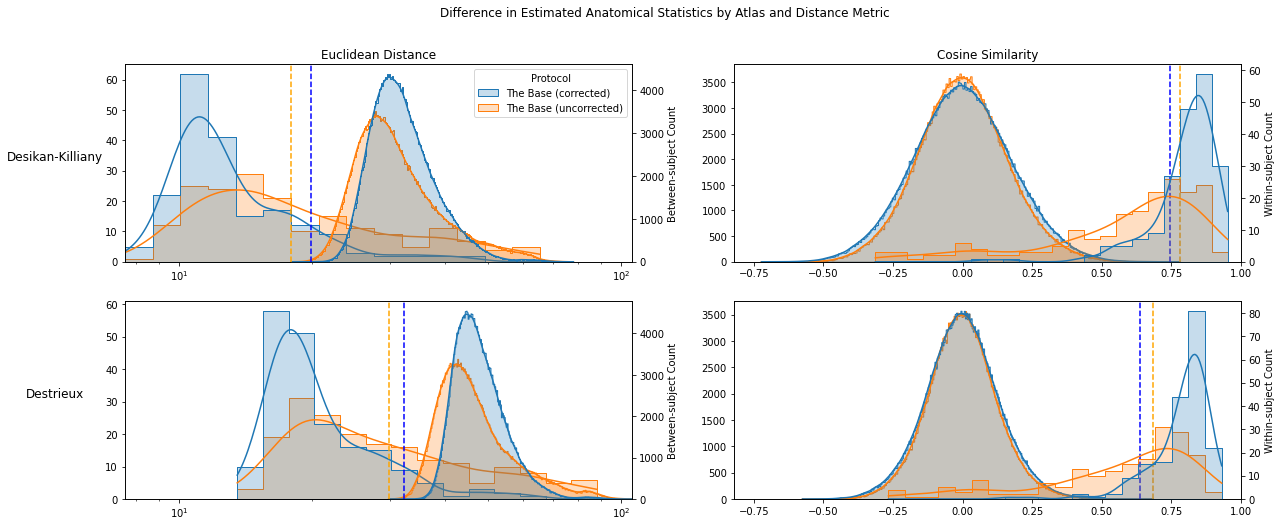

In [29]:
import seaborn as sns

dk_differences = differences[differences["Atlas"] == "Desikan-Killiany"]
dk_differences_corrected = dk_differences[dk_differences["Protocol"] == "The Base (corrected)"]
dk_differences_uncorrected = dk_differences[dk_differences["Protocol"] == "The Base (uncorrected)"]
dk_within = dk_differences.loc[dk_differences["Same Subject"]]
dk_between = dk_differences.loc[~dk_differences["Same Subject"].astype(bool)]
dk_between_uncorrected = dk_between.loc[dk_between["Protocol"] == "The Base (uncorrected)"]
dk_between_corrected = dk_between.loc[dk_between["Protocol"] == "The Base (corrected)"]
dk_between_min_euclidean_uncorr = dk_between_uncorrected["Euclidean Distance"].min()
dk_between_min_euclidean_corr = dk_between_corrected["Euclidean Distance"].min()
dk_between_max_cos_uncorr = dk_between_uncorrected["Cosine Similarity"].max()
dk_between_max_cos_corr = dk_between_corrected["Cosine Similarity"].max()

de_differences = differences[differences["Atlas"] == "Destrieux"]
de_differences_corrected = de_differences[de_differences["Protocol"] == "The Base (corrected)"]
de_differences_uncorrected = de_differences[de_differences["Protocol"] == "The Base (uncorrected)"]
de_within = de_differences.loc[de_differences["Same Subject"]]
de_between = de_differences.loc[~de_differences["Same Subject"].astype(bool)]
de_between_uncorrected = de_between.loc[de_between["Protocol"] == "The Base (uncorrected)"]
de_between_corrected = de_between.loc[de_between["Protocol"] == "The Base (corrected)"]
de_between_min_euclidean_uncorr = de_between_uncorrected["Euclidean Distance"].min()
de_between_min_euclidean_corr = de_between_corrected["Euclidean Distance"].min()
de_between_max_cos_uncorr = de_between_uncorrected["Cosine Similarity"].max()
de_between_max_cos_corr = de_between_corrected["Cosine Similarity"].max()

euclidean_range = (differences["Euclidean Distance"].min(), differences["Euclidean Distance"].max())
cosine_range = (differences["Cosine Similarity"].min()-0.1, 1)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 8))
sns.histplot(data=dk_within, x="Euclidean Distance", hue="Protocol", log_scale=True, kde=True, ax=axes[0, 0], legend=True, element="step")
axes[0, 0].set_ylabel("Desikan-Killiany", rotation=0, size="large", labelpad=50)
axes[0, 0].set(title="Euclidean Distance", xlabel=None, xlim=euclidean_range)
ax2 = axes[0, 0].twinx()
ax2.set(ylabel="Between-subject Count")
sns.histplot(data=dk_between, x="Euclidean Distance", hue="Protocol", log_scale=True, kde=True, ax=ax2, legend=False, element="step")
ax2.axvline(dk_between_min_euclidean_uncorr, linestyle="dashed", color="orange")
ax2.axvline(dk_between_min_euclidean_corr, linestyle="dashed", color="blue")

sns.histplot(data=dk_between, x="Cosine Similarity", hue="Protocol", ax=axes[0, 1], legend=False, element="step", kde=True)
axes[0, 1].set(title="Cosine Similarity", xlabel=None, ylabel=None, xlim=cosine_range)
axes[0, 1].axvline(dk_between_max_cos_uncorr, linestyle="dashed", color="orange")
axes[0, 1].axvline(dk_between_max_cos_corr, linestyle="dashed", color="blue")
ax2 = axes[0, 1].twinx()
ax2.set(ylabel="Within-subject Count")
sns.histplot(data=dk_within, x="Cosine Similarity", hue="Protocol", ax=ax2, legend=False, element="step", kde=True)


sns.histplot(data=de_within, x="Euclidean Distance", hue="Protocol", log_scale=True, kde=True, ax=axes[1, 0], legend=False, element="step")
ax2 = axes[1, 0].twinx()
axes[1, 0].set_ylabel("Destrieux", rotation=0, size="large", labelpad=50)
axes[1, 0].set(xlabel=None, xlim=euclidean_range)
ax2.set(ylabel="Between-subject Count")
sns.histplot(data=de_between, x="Euclidean Distance", hue="Protocol", log_scale=True, kde=True, ax=ax2, legend=False, element="step")
ax2.axvline(de_between_min_euclidean_uncorr, linestyle="dashed", color="orange")
ax2.axvline(de_between_min_euclidean_corr, linestyle="dashed", color="blue")

sns.histplot(data=de_between, x="Cosine Similarity", hue="Protocol", ax=axes[1, 1], legend=False, element="step", kde=True)
axes[1, 1].set(ylabel=None, xlabel=None, xlim=cosine_range)
axes[1, 1].axvline(de_between_max_cos_uncorr, linestyle="dashed", color="orange")
axes[1, 1].axvline(de_between_max_cos_corr, linestyle="dashed", color="blue")
ax2 = axes[1, 1].twinx()
ax2.set(xlabel=None, ylabel="Within-subject Count")
sns.histplot(data=de_within, x="Cosine Similarity", hue="Protocol", ax=ax2, legend=False, element="step", kde=True)
# fig.tight_layout()
_ = fig.suptitle("Difference in Estimated Anatomical Statistics by Atlas and Distance Metric")

In [30]:
fig.savefig("anatomical_stats_diff.png")

## Classification

### Naive classifier

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class SimpleThresholdClassifier(ClassifierMixin, BaseEstimator):
    """ An example classifier which implements a 1-NN algorithm.

    For more information regarding how to build your own classifier, read more
    in the :ref:`User Guide <user_guide>`.

    Parameters
    ----------
    demo_param : str, default='demo'
        A parameter used for demonstation of how to pass and store paramters.

    Attributes
    ----------
    X_ : ndarray, shape (n_samples, n_features)
        The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
        The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
        The classes seen at :meth:`fit`.
    """
    def __init__(self, threshold: float = None, method: str = "min"):
        self.threshold = threshold
        self.method = method
        

    def fit(self, X, y):
        """A reference implementation of a fitting function for a classifier.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.

        Returns
        -------
        self : object
            Returns self.
        """
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        
        self.threshold = getattr(X[~y], self.method)()
        # Return the classifier
        return self

    def predict(self, X):
        """ A reference implementation of a prediction for a classifier.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.

        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False)
        if self.method == "min":
            return X < self.threshold
        elif self.method == "max":
            return X > self.threshold


In [42]:
dk_euclidean_estimator = SimpleThresholdClassifier(method="min")
dk_cosine_estimator = SimpleThresholdClassifier(method="max")

In [43]:
X_dk_euclidean = dk_differences_corrected["Euclidean Distance"]
X_dk_cosine = dk_differences_corrected["Cosine Similarity"]
y_dk = dk_differences_corrected["Same Subject"].astype(bool)
_ = dk_euclidean_estimator.fit(X_dk_euclidean, y_dk)
_ = dk_cosine_estimator.fit(X_dk_cosine, y_dk)

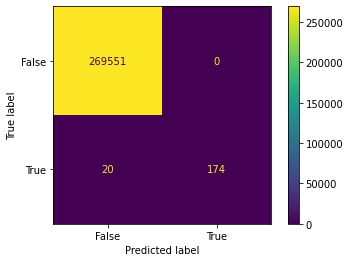

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(dk_euclidean_estimator, X_dk_euclidean, y_dk)

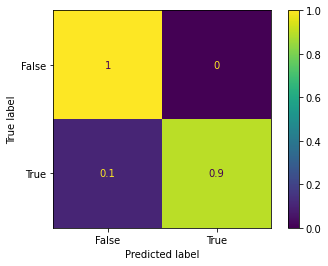

In [45]:
_ = ConfusionMatrixDisplay.from_estimator(dk_euclidean_estimator, X_dk_euclidean, y_dk, normalize="true")

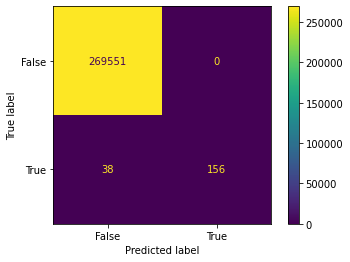

In [46]:
_ = ConfusionMatrixDisplay.from_estimator(dk_cosine_estimator, X_dk_cosine, y_dk)

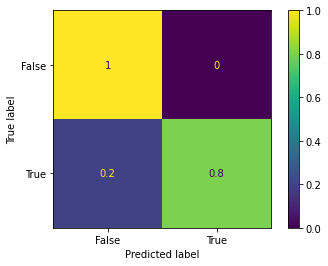

In [47]:
_ = ConfusionMatrixDisplay.from_estimator(dk_cosine_estimator, X_dk_cosine, y_dk, normalize="true")

In [48]:
de_euclidean_estimator = SimpleThresholdClassifier(method="min")
de_cosine_estimator = SimpleThresholdClassifier(method="max")

In [56]:
X_de_euclidean = de_differences_corrected["Euclidean Distance"]
X_de_cosine = de_differences_corrected["Cosine Similarity"]
y_de = de_differences_corrected["Same Subject"].astype(bool)
_ = de_euclidean_estimator.fit(X_de_euclidean, y_de)
_ = de_cosine_estimator.fit(X_de_cosine, y_de)

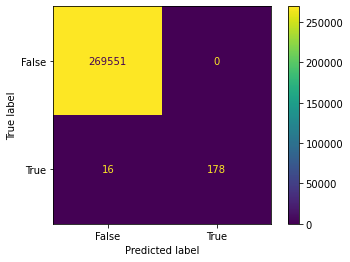

In [57]:
_ = ConfusionMatrixDisplay.from_estimator(de_euclidean_estimator, X_de_euclidean, y_de)

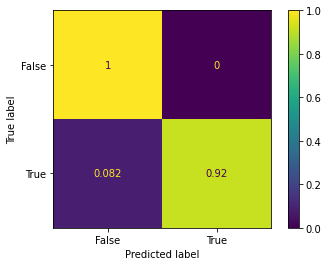

In [58]:
_ = ConfusionMatrixDisplay.from_estimator(de_euclidean_estimator, X_de_euclidean, y_de, normalize="true")

In [59]:
d

NameError: name 'd' is not defined

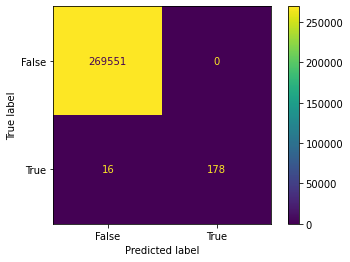

In [60]:
_ = ConfusionMatrixDisplay.from_estimator(de_cosine_estimator, X_de_cosine, y_de)

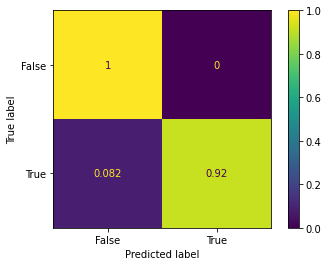

In [61]:
_ = ConfusionMatrixDisplay.from_estimator(de_cosine_estimator, X_de_cosine, y_de, normalize="true")

In [76]:
euclidean_mistakes = set(de_differences_corrected.loc[de_euclidean_estimator.predict(X_de_euclidean) != y_de].index)# | set(dk_differences_corrected.loc[dk_euclidean_estimator.predict(X_dk_euclidean) != y_dk].index)
dk_cosine_mistakes = set(dk_differences_corrected.loc[dk_cosine_estimator.predict(X_dk_cosine) != y_dk].index)
de_cosine_mistakes = set(de_differences_corrected.loc[de_cosine_estimator.predict(X_de_cosine) != y_de].index)
cosine_mistakes = dk_cosine_mistakes | de_cosine_mistakes
mistake_pairs = euclidean_mistakes | cosine_mistakes
mistake_runs = set(value for run_pair in euclidean_mistakes | cosine_mistakes for value in run_pair)

In [63]:
mistake_scan_ids = set(context.loc[mistake_runs, "Scan ID"].values)

In [86]:
def get_metric_min(context: pd.DataFrame, iqms: pd.DataFrame, metric: str, run_id_1: int, run_id_2: int) -> float:
    scan_id_1 = context.loc[run_id_1, "Scan ID"]
    scan_id_2 = context.loc[run_id_2, "Scan ID"]
    try:
        iqm_1 = iqms.loc[scan_id_1, metric]
        iqm_2 = iqms.loc[scan_id_2, metric]        
    except KeyError:
        pass
    else:
        return min([iqm_1, iqm_2]) - abs(iqm_1 - iqm_2) ** 2

def get_day_delta(context: pd.DataFrame, run_id_1: int, run_id_2: int) -> int:
    time_1 = context.loc[run_id_1, "Session Time"]
    time_2 = context.loc[run_id_2, "Session Time"]
    return abs((time_1 - time_2).days)

In [87]:
base_within_diffs = de_differences_corrected[de_differences_corrected["Same Subject"]].copy()

In [88]:
iqms

,cjv,cnr,efc,fber,snr_gm,snr_total
Scan ID,,,,,,
12,0.592860,2.137823,0.580149,319.760358,9.681746,7.858834
16,0.350938,3.698095,0.549574,1990.925808,11.356038,12.308991
357,0.370318,3.484616,0.578532,3263.597756,10.635417,12.329662
365,0.888411,1.473058,0.603492,417.856241,7.318458,7.252034
4304,0.375342,3.458272,0.578163,4247.156632,10.923757,12.697475
...,...,...,...,...,...,...
60301,0.374972,3.501062,0.605794,3137.230890,12.175717,13.131068
30235,0.507154,2.632390,0.569438,367.063244,9.056982,9.629662
30264,0.448023,2.826230,0.645375,397.240198,9.756376,10.636783


In [89]:
run_frame = pd.DataFrame(base_within_diffs.index.to_list(), columns=["Run 1", "Run 2"], index=base_within_diffs.index)
base_within_diffs["Day Delta"] = run_frame.swifter.apply(lambda runs: get_day_delta(context, runs["Run 1"], runs["Run 2"]), axis=1)
base_within_diffs["Total SNR"] = run_frame.swifter.apply(lambda runs: get_metric_min(context, iqms, "snr_total", runs["Run 1"], runs["Run 2"]), axis=1)
base_within_diffs["GM SNR"] = run_frame.swifter.apply(lambda runs: get_metric_min(context, iqms, "snr_gm", runs["Run 1"], runs["Run 2"]), axis=1)
base_within_diffs["CNR"] = run_frame.swifter.apply(lambda runs: get_metric_min(context, iqms, "cnr", runs["Run 1"], runs["Run 2"]), axis=1)
base_within_diffs["EFC"] = run_frame.swifter.apply(lambda runs: get_metric_min(context, iqms, "efc", runs["Run 1"], runs["Run 2"]), axis=1)
base_within_diffs["FBER"] = run_frame.swifter.apply(lambda runs: get_metric_min(context, iqms, "fber", runs["Run 1"], runs["Run 2"]), axis=1)
base_within_diffs = base_within_diffs.dropna()

Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

In [90]:
base_within_diffs

,Euclidean Distance,Cosine Similarity,Same Subject,Protocol,Atlas,Day Delta,Total SNR,GM SNR,CNR,EFC,FBER
"(66, 1212)",15.05209,0.91903,True,The Base (corrected),Destrieux,77,12.505530,11.992606,3.833131,0.586609,-8.754446e+02
"(77, 4786)",16.157018,0.844398,True,The Base (corrected),Destrieux,103,11.581015,11.176452,3.222629,0.583696,-3.811820e+06
"(85, 490)",31.657912,0.66252,True,The Base (corrected),Destrieux,137,8.851603,10.597409,3.059118,0.587151,-5.136036e+05
"(90, 326)",18.404595,0.829831,True,The Base (corrected),Destrieux,141,11.676939,11.021419,3.513219,0.581552,-2.724627e+05
"(93, 1389)",19.044417,0.830223,True,The Base (corrected),Destrieux,80,12.043136,11.686563,3.620672,0.556383,-2.622866e+06
...,...,...,...,...,...,...,...,...,...,...,...
"(1935, 1950)",18.459218,0.862159,True,The Base (corrected),Destrieux,0,11.819007,11.523799,3.460306,0.608170,-3.363215e+04
"(1972, 1986)",19.713522,0.808279,True,The Base (corrected),Destrieux,0,11.614371,10.807557,3.617309,0.576038,-2.516073e+04
"(1999, 2015)",26.150682,0.714716,True,The Base (corrected),Destrieux,0,12.432832,11.759303,3.699103,0.587969,-5.190550e+04
"(2029, 2043)",21.832903,0.745908,True,The Base (corrected),Destrieux,0,10.549528,10.724331,2.985484,0.577972,-2.699701e+05


In [91]:
def annotate(data, **kws):
    r, p = scipy.stats.pearsonr(data.iloc[:, 0], data.iloc[:, 1])
    ax = plt.gca()
    ax.text(.75, .8, 'r={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes)

In [92]:
fig.savefig("cnr.png")

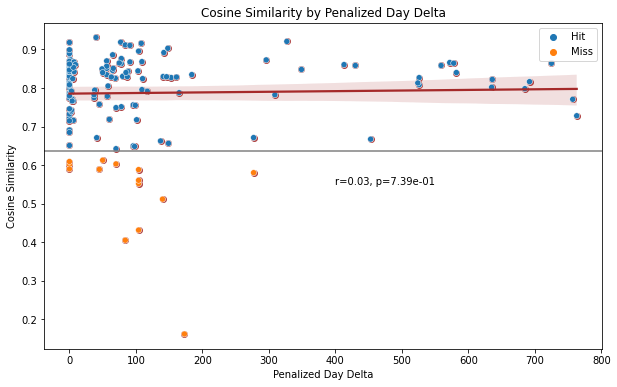

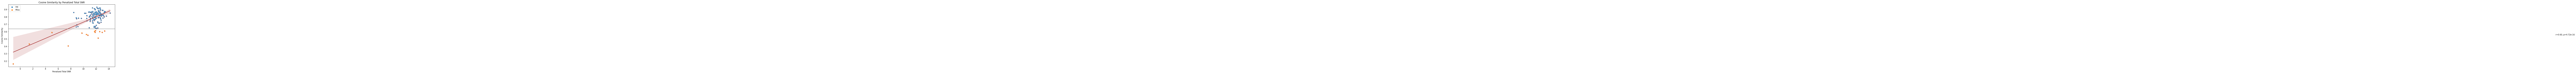

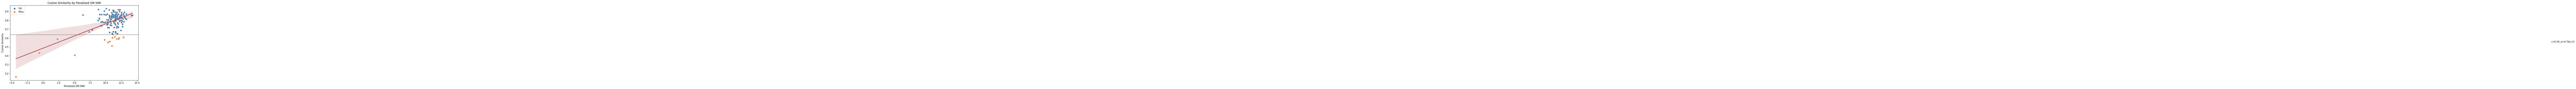

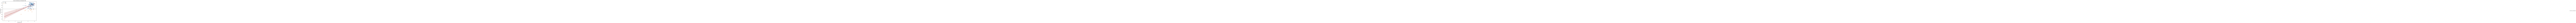

In [95]:
measures = "Day Delta", "Total SNR", "GM SNR", "CNR", "EFC", "FBER"
for i, measure in enumerate(measures):
    data = base_within_diffs.dropna()[["Cosine Similarity", measure]].astype(float)
    r, p = scipy.stats.pearsonr(data.iloc[:, 0], data.iloc[:, 1])
    fig, ax = plt.subplots(figsize=(10, 6))
    plot = sns.regplot(data=data, x=measure, y="Cosine Similarity", ax=ax, color="brown")
    data["hue"] = pd.Series(data.index.isin(de_cosine_mistakes), index=data.index).replace({True: "Miss", False: "Hit"})
    sns.scatterplot(measure, "Cosine Similarity", data=data, hue="hue", ax=ax)
    ax.set(xlabel=f"Penalized {measure}", title=f"Cosine Similarity by Penalized {measure}")
    ax.axhline(de_between_max_cos_corr, label="Min. Between-Subject Distance", color="grey")
    ax.text(0.5, 0.75, f"r={r:.2f}, p={p:.2e}")
    ax.get_legend().set_title(None)
    if measure == "CNR":
        break